In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


# 1 - Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import Input
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

# 2 - Input data

<Axes: >

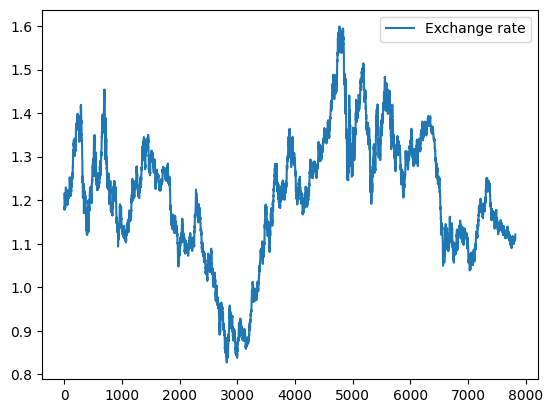

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2024_FINAL_REPORT/2.EUR_USD/EUR_USD_1990_2019.csv")
data.plot()

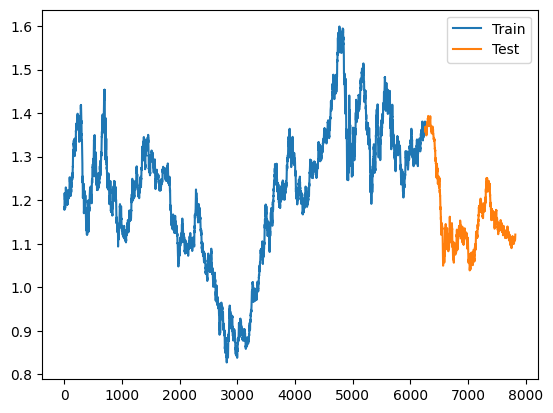

In [ ]:
data_train, data_test = train_test_split(data, test_size = 0.2, shuffle = False)
plt.plot([i for i in range(len(data_train))], data_train, label = "Train")
plt.plot([i for i in range(len(data_train), len(data_train) + len(data_test))], data_test, label = "Test")
plt.legend()
plt.show()

# 3 - Define function and class

In [ ]:
def transform(data, window_size=5):
    np_data = data.to_numpy()
    X, y = [], []
    for i in range(len(np_data) - window_size):
        X.append([j for j in np_data[i:i+window_size]])
        y.append(np_data[i+window_size])
    return np.array(X), np.array(y)

In [ ]:
def create_lstm_model(units):
    global window_size
    model = Sequential()
    model.add(Input(shape = (w, 1)))
    model.add(LSTM(units, activation = 'relu', return_sequences = True))
    model.add(LSTM(int(units/2), activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer = "adam", loss='mse')
    return model

# 4 - Using GridSearchCV to compare

In [ ]:
lstm_model = KerasRegressor(model = create_lstm_model, units = 50)

lstm_param_grid = {
    'units': [50, 100],
}

In [ ]:
window_size_values = [11, 22, 33]
lstm_best_models = []

for w in window_size_values:
    X, y = transform(data_train, w)
    window_size = w
    lstm_grid_search = GridSearchCV(estimator = lstm_model, param_grid = lstm_param_grid, cv = 60, verbose = 0, scoring = "neg_mean_squared_error")
    lstm_grid_search.fit(X, y)
    lstm_best_models.append((w, lstm_grid_search.best_params_, lstm_grid_search.best_score_))

lstm_df = pd.DataFrame(lstm_best_models, columns = ["window_size", "best_params", "best_score"])
lstm_df

192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.5609
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - loss: 0.3883
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 0.7115


1/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3884
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.5330
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.4418
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.4512
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.4366
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3681
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2976
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.4528
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.3092
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.4495
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
192/192 ━

,window_size,best_params,best_score
0,11,{'units': 100},-0.001605
1,22,{'units': 100},-0.002335
2,33,{'units': 100},-0.001620


Sau khi chạy xong GridSearch ta có kết quả như sau:

In [ ]:
best_result = lstm_df.loc[lstm_df["best_score"].idxmax()]

In [ ]:
print("LSTM best result: ")
print("_", best_result["window_size"])
print("_", best_result["best_params"])
print("_", best_result["best_score"])

LSTM best result: 
_ 11
_ {'units': 100}
_ -0.0016051878124837163


#5 - Test

In [ ]:
X_train, y_train = transform(data_train, best_result["window_size"])
X_test, y_test = transform(data_test, best_result["window_size"])

In [ ]:
model = Sequential()
model.add(Input(shape = (best_result["window_size"], 1)))
model.add(LSTM(best_result["best_params"]["units"], activation = 'relu', return_sequences = True))
model.add(LSTM(int(best_result["best_params"]["units"]/2), activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer = "adam", loss='mse')
model.summary()
model.fit(X_train, y_train, epochs = 100, verbose = 0)

Model: "sequential_363"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_726 (LSTM)                      │ (None, 11, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_727 (LSTM)                      │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_363 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_363 (Dense)                    │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
print("LSTM mse score: ", mse(y_test.ravel(), y_pred))
print("LSTM mape score: ", mape(y_test.ravel(), y_pred))

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
LSTM mse score:  7.179765955416697e-05
LSTM mape score:  0.005803470113099769


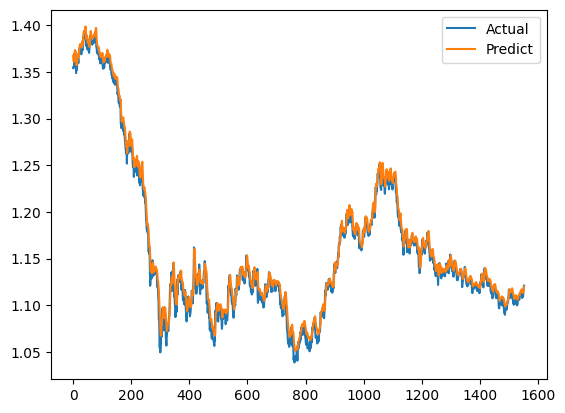

In [17]:
plt.plot(y_test, label = "Actual")
plt.plot(y_pred, label = "Predict")
plt.legend()
plt.show()

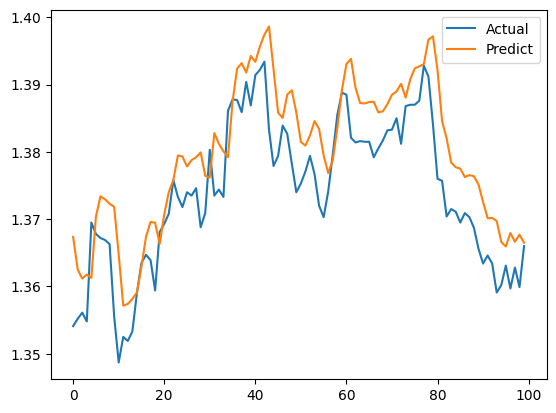

In [18]:
plt.plot(y_test[:100], label = "Actual")
plt.plot(y_pred[:100], label = "Predict")
plt.legend()
plt.show()